In [1]:
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
print(train_images.shape)

(60000, 28, 28, 1)


In [3]:
# 픽셀 값을 0~1 사이로 정규화한다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
modelpath = "./model_save/{epoch:03d}-{val_loss:.4f}.hdf5"

In [8]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose =1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [9]:
history = model.fit(train_images, train_labels, validation_split = 0.2, epochs=30, batch_size = 200, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
233/240 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8968
Epoch 1: val_loss improved from inf to 0.10496, saving model to ./model_save/001-0.1050.hdf5
240/240 [==============================] - 14s 7ms/step - loss: 0.3475 - accuracy: 0.8986 - val_loss: 0.1050 - val_accuracy: 0.9697
Epoch 2/30
231/240 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9760
Epoch 2: val_loss improved from 0.10496 to 0.06195, saving model to ./model_save/002-0.0619.hdf5
240/240 [==============================] - 1s 6ms/step - loss: 0.0792 - accuracy: 0.9760 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 3/30
231/240 [===========================>..] - ETA: 0s - loss: 0.0553 - accuracy: 0.9831
Epoch 3: val_loss improved from 0.06195 to 0.05260, saving model to ./model_save/003-0.0526.hdf5
240/240 [==============================] - 1s 6ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0526 - val_accuracy: 0.9845
Epoch 4/30
240/240 [===========

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

In [10]:
model = models.load_model('./model_save/011-0.0342.hdf5')

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9907
테스트 정확도: 0.9907000064849854


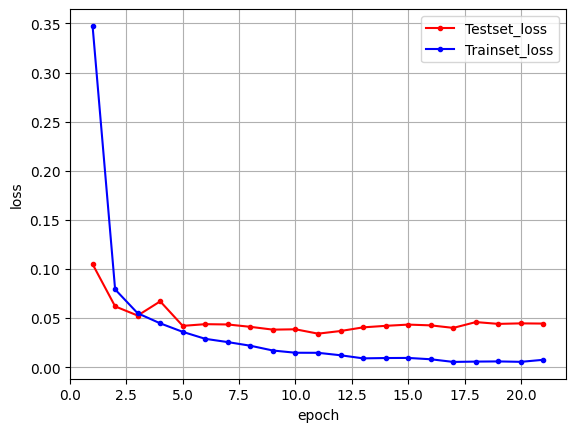

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 테스트이미지.png to 테스트이미지.png


In [14]:
filename = '테스트이미지.png'

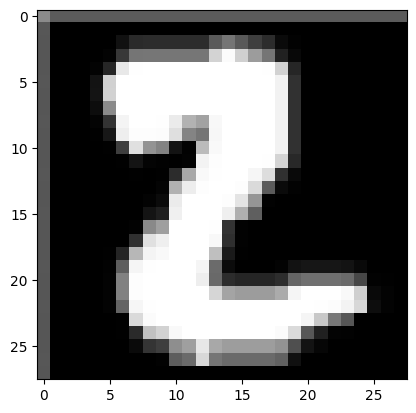

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt

image=cv.imread(filename, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
plt.imshow(image, cmap = 'Greys')
plt.show()

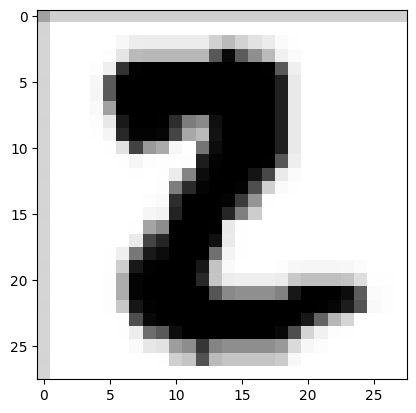

In [16]:
image = 255 - image
plt.imshow(image, cmap = 'Greys')
plt.show()

In [20]:
pred = model.predict(image.reshape(1, 28,28,1))
print(pred)

1/1 [==============================] - 1s 527ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
print(pred.argmax())

2
